In [19]:
# Importing necssary modules
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
# from scripts.utils import load_device_data

In [20]:
# Load the sampled data prepared earlier
sample_data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\projects\final year projects\dataset\sample_eda_data.csv")


In [21]:
sample_data.head()


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,device,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000002,1.766602,...,0.000000e+00,5.306770,98.0,0.000002,138.592929,4.070000e-12,-8.750000e-29,-3.400000e-17,Danmini_Doorbell,benign
1,3.959443,101.999972,1.125510e-04,3.977416,101.998141,0.007434,4.114565,101.880681,0.463040,5.541431,...,-1.320000e-17,4.219563,102.0,0.000018,144.249783,3.950000e-10,5.160000e-22,1.950000e-12,Danmini_Doorbell,benign
2,4.969537,102.000000,0.000000e+00,4.981694,102.000000,0.000000,4.993892,101.999976,0.001027,5.996361,...,0.000000e+00,4.216806,102.0,0.000001,144.249783,4.070000e-12,1.310000e-28,5.100000e-17,Danmini_Doorbell,benign
3,2.991987,102.000000,0.000000e+00,2.995188,102.000000,0.000000,2.998398,101.999958,0.001758,3.843674,...,-5.540000e-29,3.405410,102.0,0.000001,144.249783,4.070000e-12,-3.030000e-28,-1.180000e-16,Danmini_Doorbell,benign
4,4.909553,102.000000,3.640000e-12,4.945479,102.000000,0.000000,4.981743,101.999991,0.000380,5.865181,...,0.000000e+00,4.228742,102.0,0.000000,144.249783,1.820000e-12,1.460000e-29,0.000000e+00,Danmini_Doorbell,benign


In [22]:
# List of devices
device_list = sample_data['device'].unique()
device_list



array(['Danmini_Doorbell', 'Ecobee_Thermostat', 'Ennio_Doorbell',
       'Philips_B120N10_Baby_Monitor',
       'Provision_PT_737E_Security_Camera',
       'Provision_PT_838_Security_Camera', 'Samsung_SNH_1011_N_Webcam',
       'SimpleHome_XCS7_1002_WHT_Security_Camera',
       'SimpleHome_XCS7_1003_WHT_Security_Camera'], dtype=object)

In [23]:
# Function to show class counts
def class_value_count(df, name):
    df['label'].value_counts().plot(kind='bar', title=f'Class count for {name}')
    plt.xlabel('Label'); plt.ylabel('Frequency')
    plt.show()

In [24]:
# 2D PCA scatter plot
def plot_2d_scatter(df, title):
    X = df.drop(['label','device'], axis=1).values
    y = df['label'].values
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=['green','red','orange'])
    plt.title(title)
    plt.show()

In [25]:
# 3D PCA scatter plot
from mpl_toolkits.mplot3d import Axes3D
def plot_3d_scatter(df, title):
    X = df.drop(['label','device'], axis=1).values
    y = df['label'].map({'benign':0,'mirai':1,'gafgyt':2}).values
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:,0], X_pca[:,1], y, c=y, cmap='viridis')
    ax.set_title(title)
    plt.show()

In [26]:
# t-SNE 2D plot
def plot_tsne(df, title, perplexity=30):
    X = df.drop(['label','device'], axis=1).values
    y = df['label'].values
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=['green','red','orange'])
    plt.title(title)
    plt.show()

Now Lets analyse each device 

Device: Danmini_Doorbell, Shape: (150, 117)


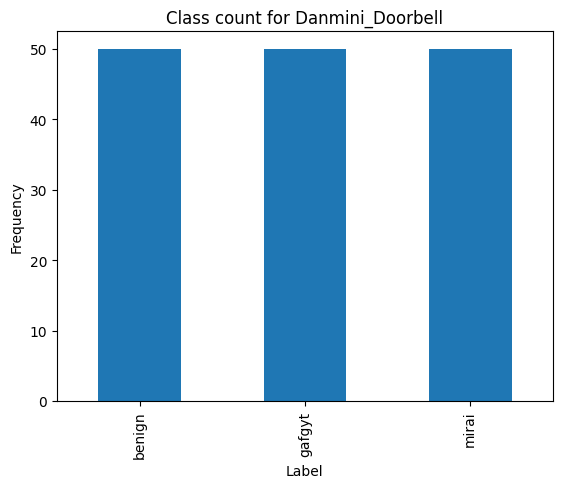

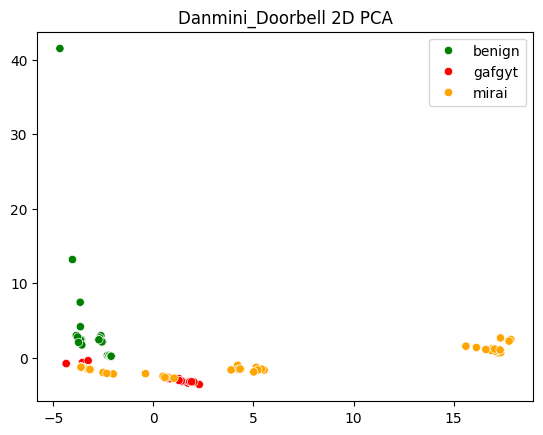

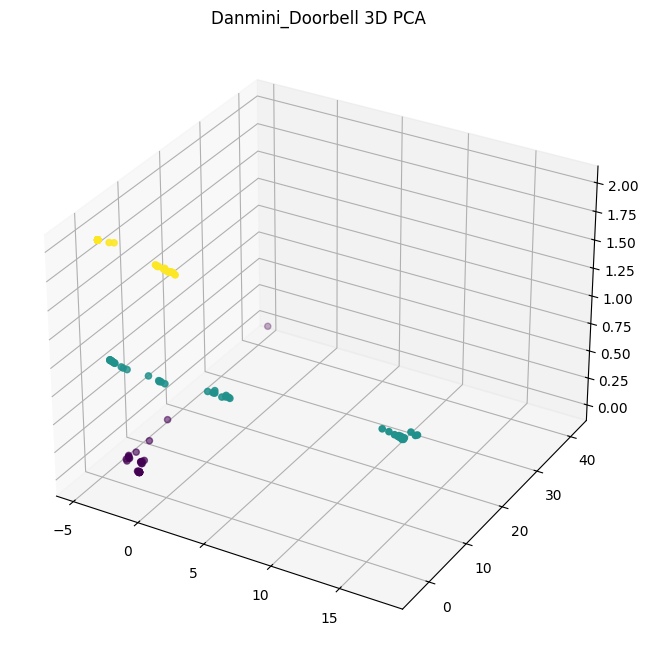

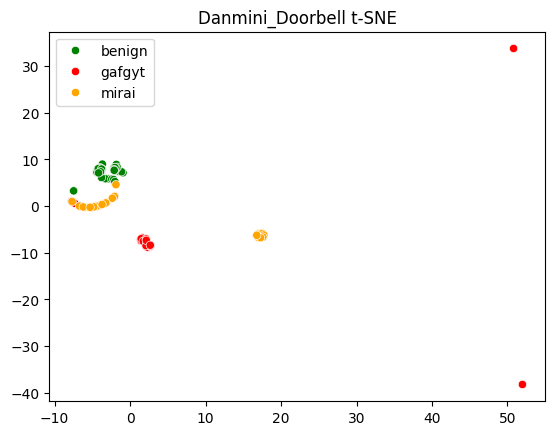

Device: Ecobee_Thermostat, Shape: (150, 117)


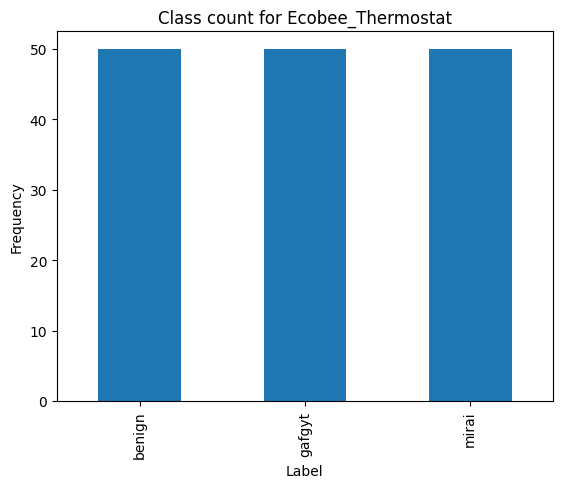

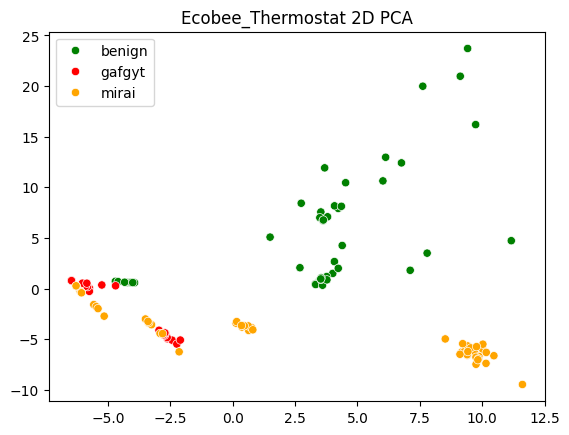

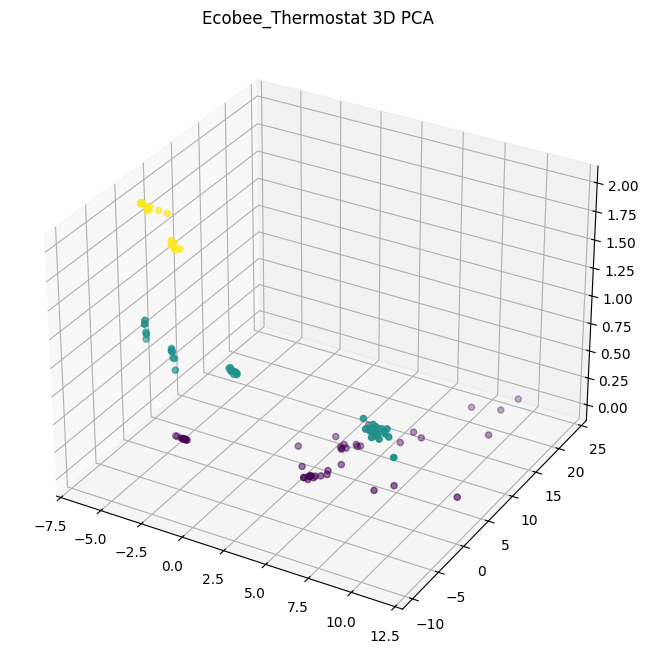

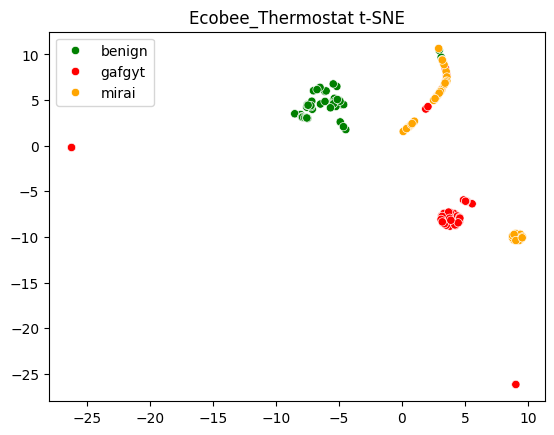

Device: Ennio_Doorbell, Shape: (100, 117)


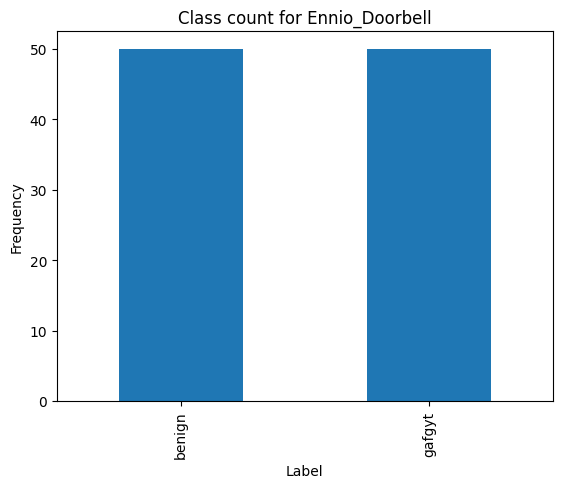

C:\Users\HP\AppData\Local\Temp\ipykernel_10676\1678843897.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=['green','red','orange'])


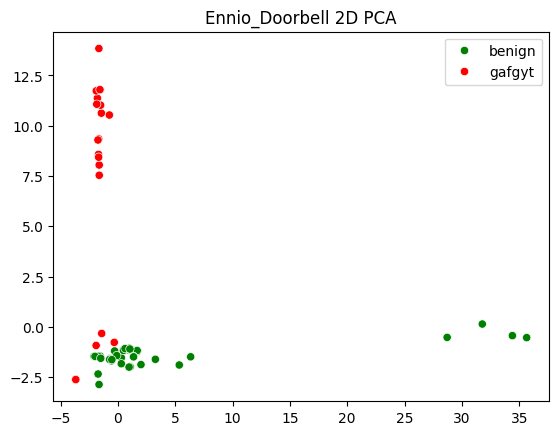

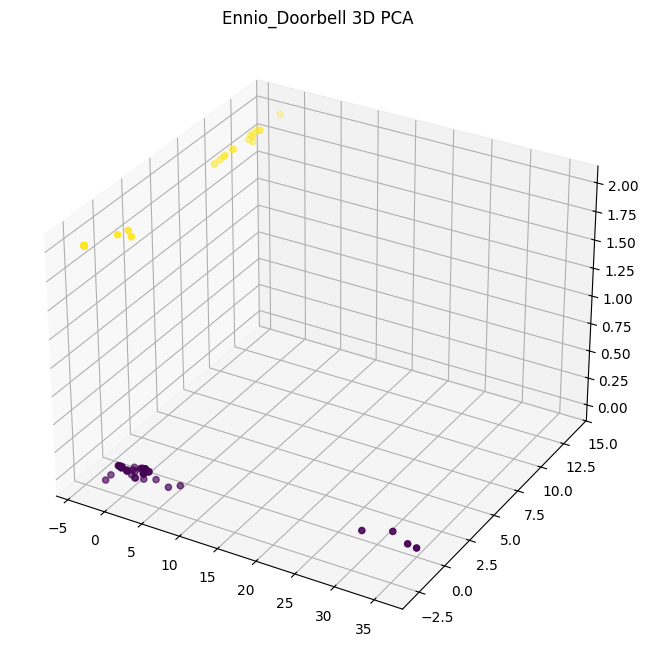

C:\Users\HP\AppData\Local\Temp\ipykernel_10676\844292798.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=['green','red','orange'])


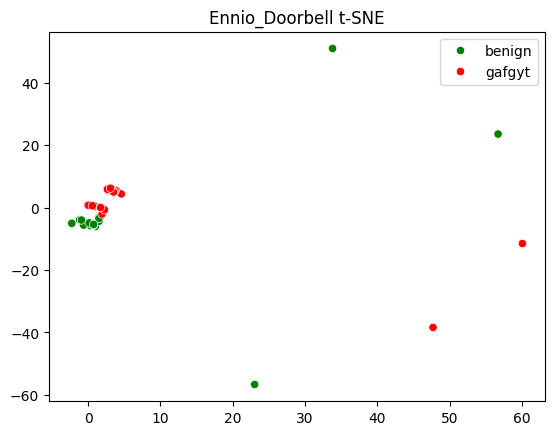

Device: Philips_B120N10_Baby_Monitor, Shape: (150, 117)


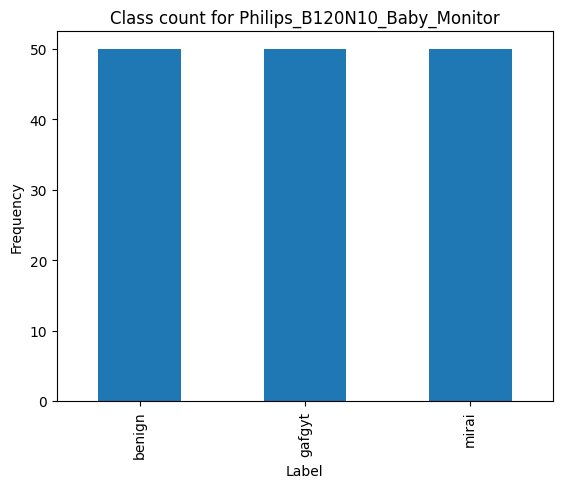

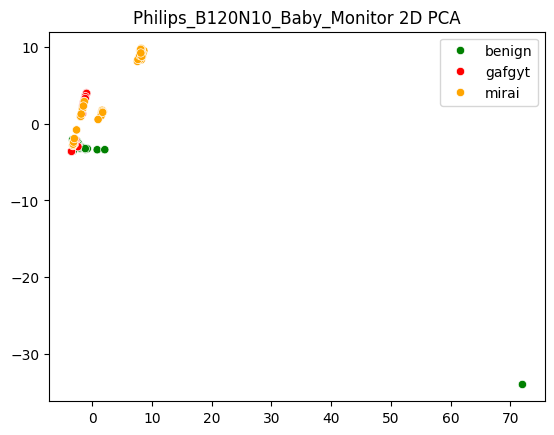

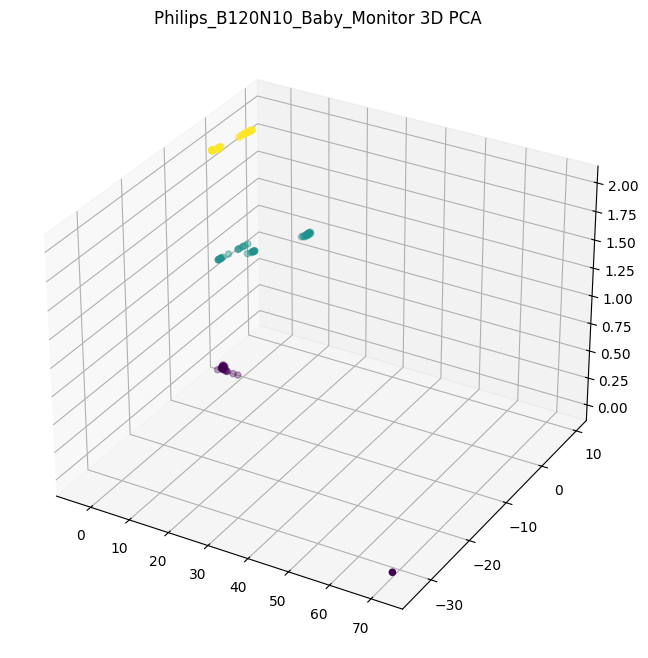

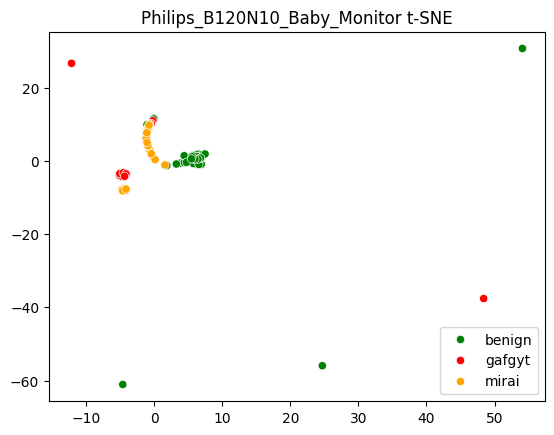

Device: Provision_PT_737E_Security_Camera, Shape: (150, 117)


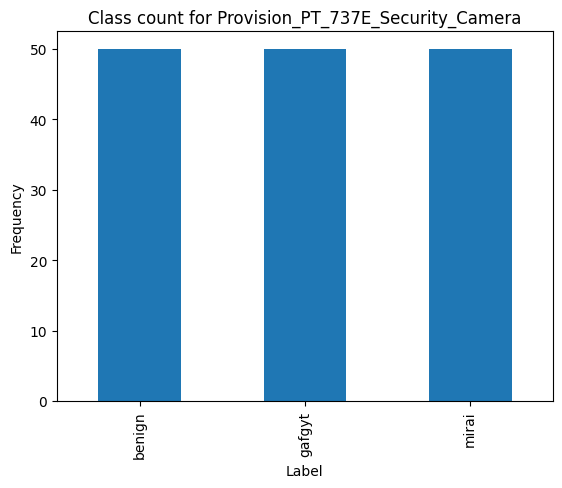

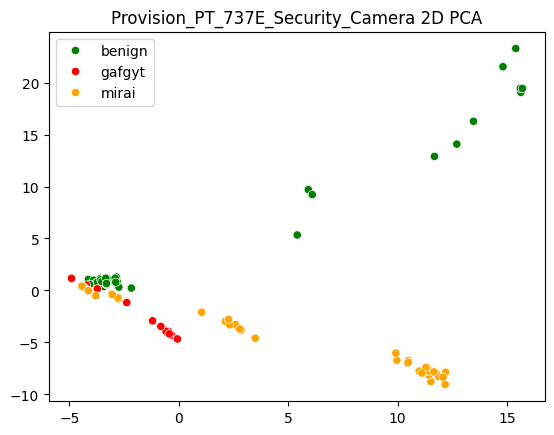

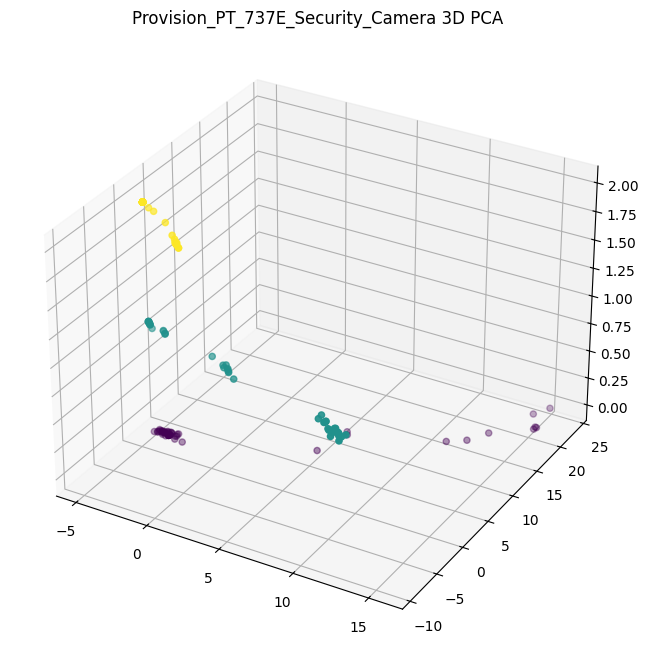

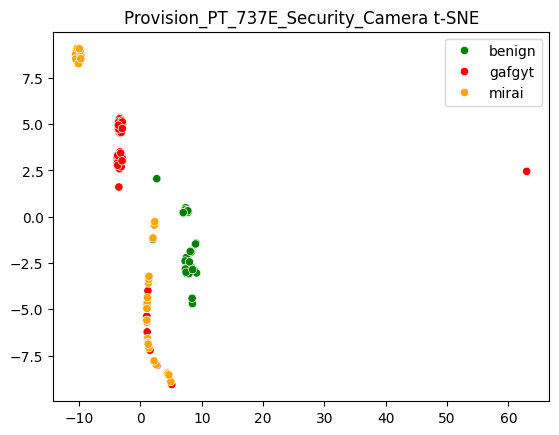

Device: Provision_PT_838_Security_Camera, Shape: (150, 117)


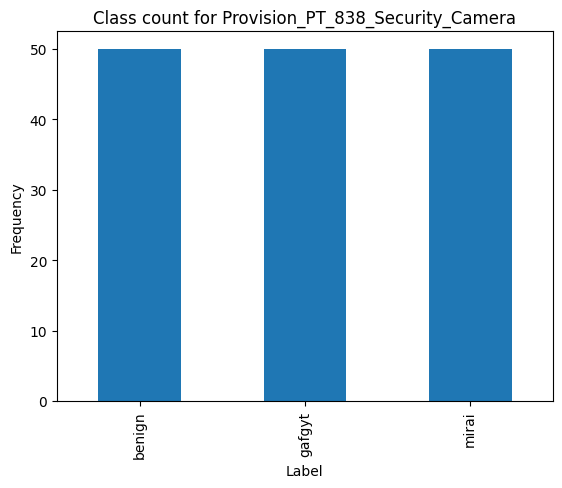

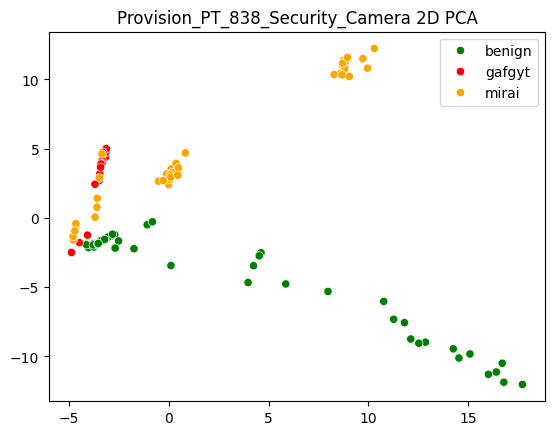

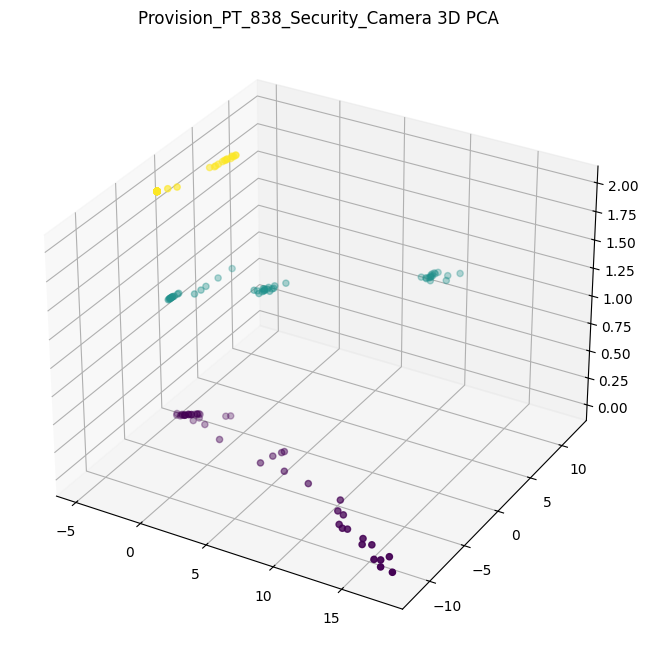

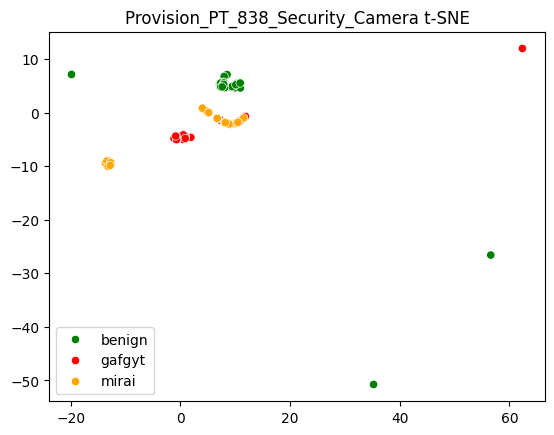

Device: Samsung_SNH_1011_N_Webcam, Shape: (100, 117)


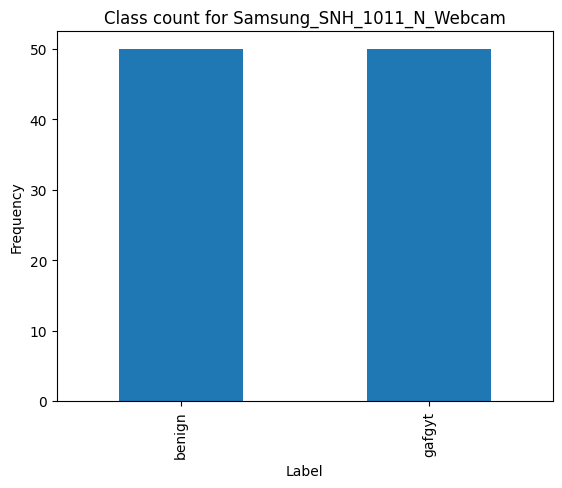

C:\Users\HP\AppData\Local\Temp\ipykernel_10676\1678843897.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=['green','red','orange'])


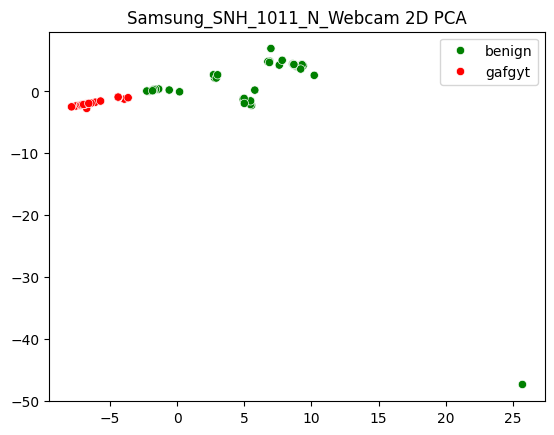

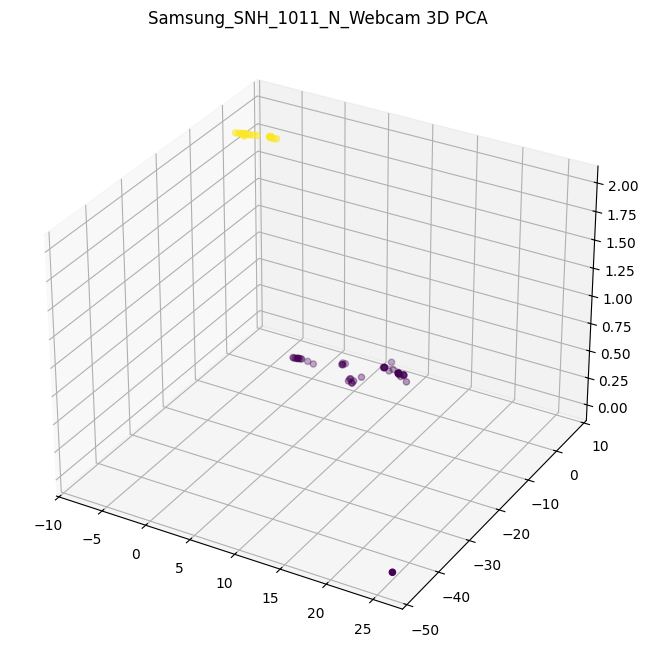

C:\Users\HP\AppData\Local\Temp\ipykernel_10676\844292798.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=['green','red','orange'])


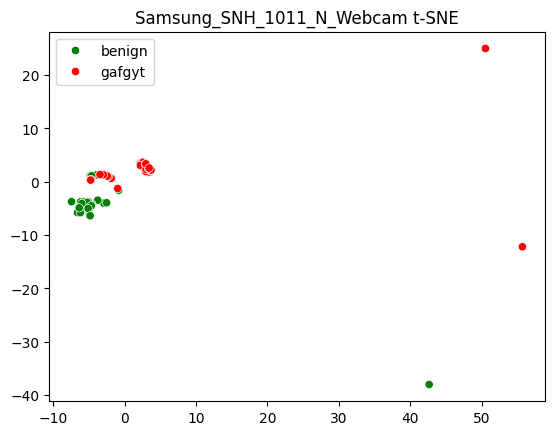

Device: SimpleHome_XCS7_1002_WHT_Security_Camera, Shape: (150, 117)


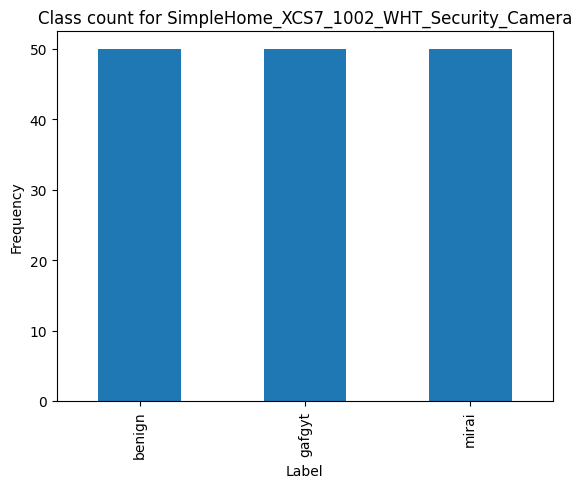

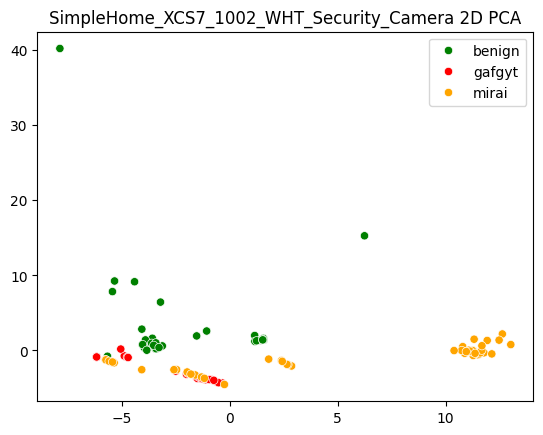

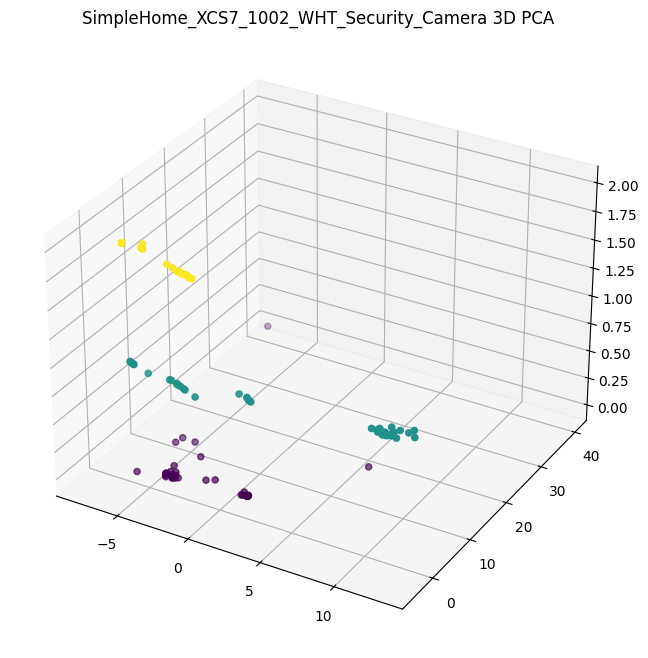

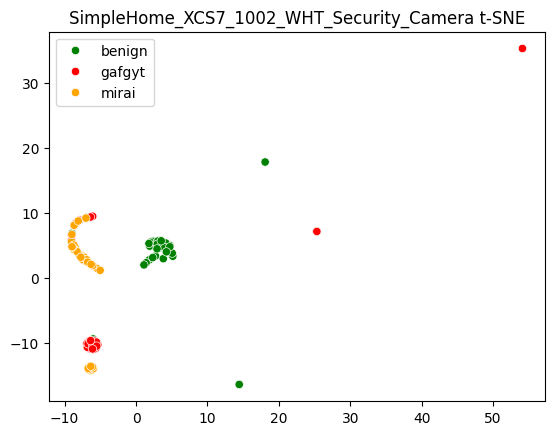

Device: SimpleHome_XCS7_1003_WHT_Security_Camera, Shape: (150, 117)


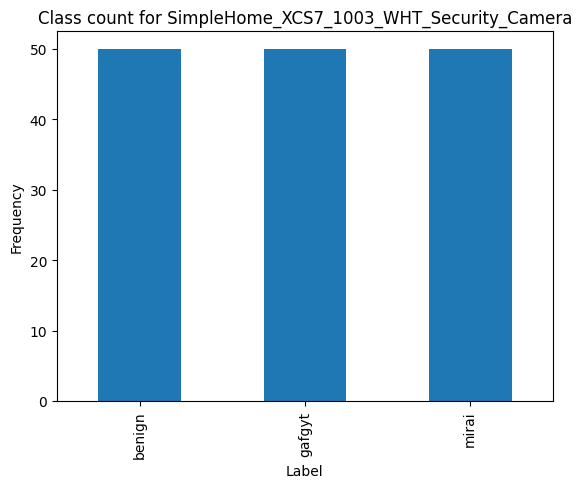

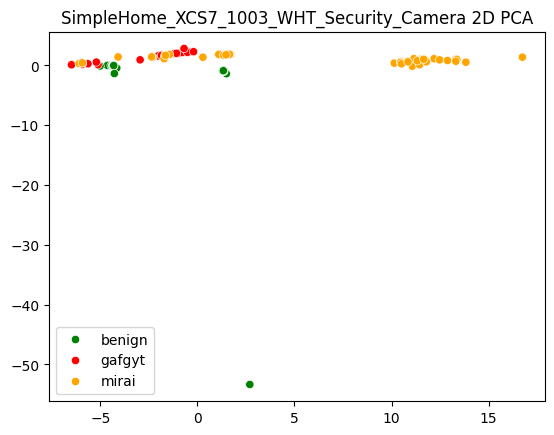

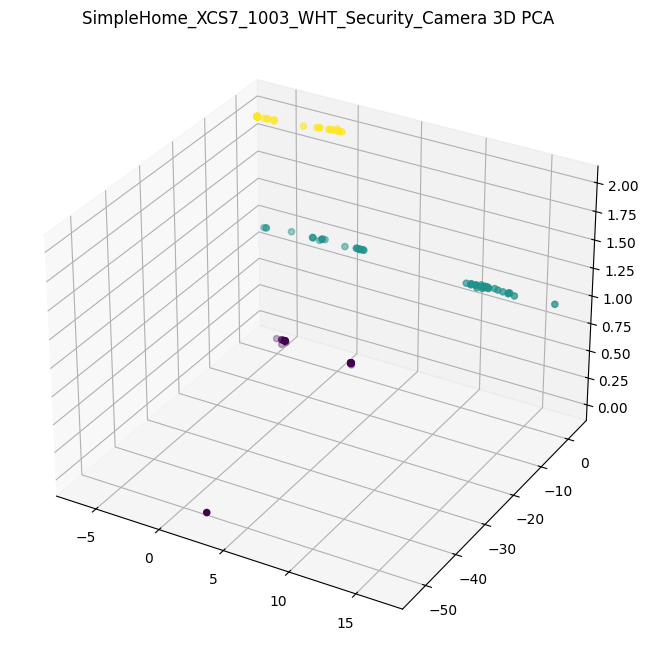

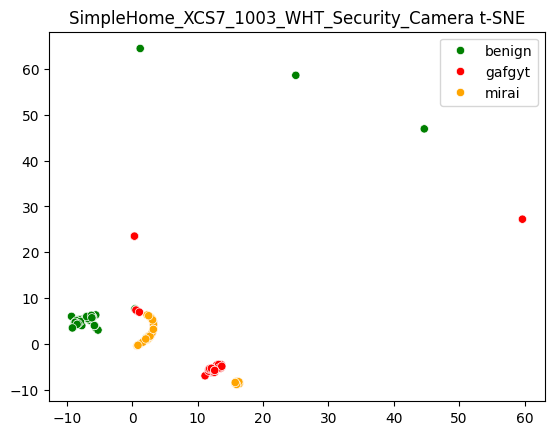

In [27]:
# Iterate over devices
for device in device_list:
    df_device = sample_data[sample_data['device']==device]
    print(f"Device: {device}, Shape: {df_device.shape}")
    class_value_count(df_device, device)
    plot_2d_scatter(df_device, f"{device} 2D PCA")
    plot_3d_scatter(df_device, f"{device} 3D PCA")
    plot_tsne(df_device, f"{device} t-SNE")


In [28]:
sample_data.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1250.000000,...,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1250.000000,1250.000000
mean,51.942452,154.464350,10013.345389,81.562054,154.891437,10974.946637,229.011135,156.209903,1.209773e+04,2051.099319,...,4.249120e+03,504.189385,0.006487,582.415881,158.433387,13.598126,179.520047,5.499740e+03,547.719964,0.009261
std,67.899329,145.128893,22665.471844,108.003218,141.806349,23781.842057,308.216981,138.210516,2.459311e+04,2788.329513,...,2.688559e+04,5077.006393,0.121936,3383.892086,171.806855,52.064997,183.924730,3.053970e+04,5219.103051,0.129455
min,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,-28079.289890,-1.450381,1.000000,60.000000,0.000000,60.000000,0.000000e+00,-23223.035380,-1.322829
25%,1.000000,60.000000,0.000000,1.000000,60.000002,0.000000,1.000000,60.004719,9.410000e-09,1.636619,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
50%,2.002232,74.024722,0.106941,2.337114,74.039997,0.850411,2.999922,74.061293,1.021838e+01,8.618231,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
75%,113.053944,219.554470,399.999797,182.560088,244.889295,1551.949399,538.966338,288.686114,4.775246e+03,4943.206999,...,3.640000e-12,0.000000,0.000000,4.991617,134.912356,0.000002,227.361005,6.560000e-12,0.000000,0.000000
max,359.374586,957.985495,390290.505400,521.071325,869.162101,418999.685100,1022.104137,739.218798,4.334179e+05,8286.186457,...,4.072958e+05,49489.951250,1.858953,29889.643391,566.000000,623.161583,1061.822326,4.139755e+05,51297.740390,1.912121


In [29]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 1.1+ MB


In [30]:
print(sample_data['device'].unique())


['Danmini_Doorbell' 'Ecobee_Thermostat' 'Ennio_Doorbell'
 'Philips_B120N10_Baby_Monitor' 'Provision_PT_737E_Security_Camera'
 'Provision_PT_838_Security_Camera' 'Samsung_SNH_1011_N_Webcam'
 'SimpleHome_XCS7_1002_WHT_Security_Camera'
 'SimpleHome_XCS7_1003_WHT_Security_Camera']


In [31]:
df_device.shape

(150, 117)

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Isolate one of the highly correlated feature groups
mi_dir_features = [col for col in sample_data.columns if 'MI_dir' in col]
mi_dir_df = sample_data[mi_dir_features]

# 2. Standardize the data (important for PCA)
scaler = StandardScaler()
mi_dir_scaled = scaler.fit_transform(mi_dir_df)

# 3. Apply PCA
#    Let's reduce the group down to 2 principal components
pca = PCA(n_components=2)
mi_dir_pca = pca.fit_transform(mi_dir_scaled)

# 4. Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=mi_dir_pca, columns=['MI_dir_PC1', 'MI_dir_PC2'])

# 5. Drop the original features and add the new PCA features
#    First, drop the original MI_dir columns from the main df
df_pca_applied =sample_data.drop(columns=mi_dir_features)

#    Then, join the new PCA components
#    (Make sure indices align. reset_index might be needed if they don't)
df_pca_applied = pd.concat([df_pca_applied.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

print("Original shape:", sample_data.shape)
print("Shape after applying PCA to one group:", df_pca_applied.shape)
df_pca_applied.head()

Original shape: (1250, 117)
Shape after applying PCA to one group: (1250, 104)


,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,...,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,device,label,MI_dir_PC1,MI_dir_PC2
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000002,1.766602,...,98.0,0.000002,138.592929,4.070000e-12,-8.750000e-29,-3.400000e-17,Danmini_Doorbell,benign,-2.101859,-0.774916
1,3.959443,101.999972,1.125510e-04,3.977416,101.998141,0.007434,4.114565,101.880681,0.463040,5.541431,...,102.0,0.000018,144.249783,3.950000e-10,5.160000e-22,1.950000e-12,Danmini_Doorbell,benign,-2.054782,-0.756061
2,4.969537,102.000000,0.000000e+00,4.981694,102.000000,0.000000,4.993892,101.999976,0.001027,5.996361,...,102.0,0.000001,144.249783,4.070000e-12,1.310000e-28,5.100000e-17,Danmini_Doorbell,benign,-2.052894,-0.743037
3,2.991987,102.000000,0.000000e+00,2.995188,102.000000,0.000000,2.998398,101.999958,0.001758,3.843674,...,102.0,0.000001,144.249783,4.070000e-12,-3.030000e-28,-1.180000e-16,Danmini_Doorbell,benign,-2.063299,-0.766468
4,4.909553,102.000000,3.640000e-12,4.945479,102.000000,0.000000,4.981743,101.999991,0.000380,5.865181,...,102.0,0.000000,144.249783,1.820000e-12,1.460000e-29,0.000000e+00,Danmini_Doorbell,benign,-2.046152,-0.746568


In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'sample_data' is your DataFrame with both numeric and object columns

# --- Step 1: Isolate numeric columns and identify correlated groups ---

# Create a temporary DataFrame with only the numeric features
numeric_df = sample_data.drop(columns=['device', 'label'])

def get_correlated_groups(df, threshold=0.95):
    """Identifies groups of highly correlated features in a DataFrame."""
    corr_matrix = df.corr().abs()
    features_in_groups = set()
    groups = []
    
    for feature in corr_matrix.columns:
        if feature not in features_in_groups:
            correlated_with_feature = corr_matrix[feature][corr_matrix[feature] > threshold].index.tolist()
            if len(correlated_with_feature) > 1:
                group = correlated_with_feature
                groups.append(group)
                features_in_groups.update(group)
                
    return groups

# Get the list of correlated groups from your numeric data
correlated_feature_groups = get_correlated_groups(numeric_df, threshold=0.95)

print(f"Found {len(correlated_feature_groups)} groups of highly correlated features.")
if correlated_feature_groups:
    print("Example of a group:", correlated_feature_groups[0])


# --- Step 2: Apply PCA to each group and update the main DataFrame ---

# Make a copy of your full original DataFrame to work on
df_pca_final = sample_data.copy()

scaler = StandardScaler()

# Loop through each identified group
for group in correlated_feature_groups:
    
    # --- FIX IS HERE ---
    # Filter the group to only include columns that actually still exist in the DataFrame
    existing_features_in_group = [feat for feat in group if feat in df_pca_final.columns]
    
    # Only proceed if there's more than one feature left to form a group
    if len(existing_features_in_group) > 1:
        
        # 1. Isolate the features of the current group using the filtered list
        group_df = df_pca_final[existing_features_in_group]
        
        # 2. Standardize the data
        group_scaled = scaler.fit_transform(group_df)
        
        # 3. Apply PCA
        pca = PCA(n_components=2)
        group_pca = pca.fit_transform(group_scaled)
        
        # 4. Create new column names
        base_name = existing_features_in_group[0].split('_')[0]
        pc_names = [f'{base_name}_PC1', f'{base_name}_PC2']
        
        # 5. Create a new DataFrame for the principal components
        pca_df = pd.DataFrame(data=group_pca, columns=pc_names, index=df_pca_final.index)
        
        # 6. Drop the original columns (using the filtered list) and add the new PCA columns
        df_pca_final = df_pca_final.drop(columns=existing_features_in_group)
        df_pca_final = pd.concat([df_pca_final, pca_df], axis=1)

# --- Step 3: Check the final result ---
print("\n--- Process Complete ---")
print("Original shape:", sample_data.shape)
print("Shape after applying PCA to all groups:", df_pca_final.shape)

Found 32 groups of highly correlated features.
Example of a group: ['MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight', 'H_L5_weight', 'H_L3_weight', 'H_L1_weight']

--- Process Complete ---
Original shape: (1250, 117)
Shape after applying PCA to all groups: (1250, 75)


In [34]:
df_pca_final.head()

,HH_L1_pcc,HH_L0.1_std,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_std,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L1_variance,...,HpHp_PC1,HpHp_PC2,HpHp_PC1,HpHp_PC2,HpHp_PC1,HpHp_PC2,HpHp_PC1,HpHp_PC2,HpHp_PC1,HpHp_PC2
0,-4.060000e-14,11.843437,3.886183e+02,-6.213171e+00,-2.755679e-02,18.302872,6.390044e+02,3.913196e+01,9.165390e-02,1.010000e-06,...,-0.202238,-0.002927,-0.223185,0.018602,-0.144656,-0.01151,-0.250125,-0.008840,-0.347913,-0.021593
1,0.000000e+00,0.000001,2.570000e-12,-2.400000e-29,-1.320000e-17,0.000018,3.950000e-10,5.160000e-22,1.950000e-12,2.270000e-13,...,-0.202238,-0.002927,-0.223185,0.018602,-0.144656,-0.01151,-0.250440,-0.008700,-0.347913,-0.021593
2,0.000000e+00,0.000002,3.640000e-12,4.860000e-34,0.000000e+00,0.000001,4.070000e-12,1.310000e-28,5.100000e-17,0.000000e+00,...,-0.202238,-0.002927,-0.223185,0.018602,-0.144656,-0.01151,-0.250440,-0.008700,-0.347913,-0.021593
3,0.000000e+00,0.000001,2.570000e-12,-1.010000e-40,-5.540000e-29,0.000001,4.070000e-12,-3.030000e-28,-1.180000e-16,0.000000e+00,...,-0.202238,-0.002927,-0.223185,0.018602,-0.144656,-0.01151,-0.250693,-0.008614,-0.347914,-0.021593
4,0.000000e+00,0.000000,0.000000e+00,-3.920000e-39,0.000000e+00,0.000000,1.820000e-12,1.460000e-29,0.000000e+00,6.530000e-11,...,-0.202238,-0.002927,-0.223185,0.018602,-0.144656,-0.01151,-0.250427,-0.008692,-0.347914,-0.021593


In [17]:
df_pca_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HH_L1_pcc              1250 non-null   float64
 1   HH_L0.1_std            1250 non-null   float64
 2   HH_L0.1_radius         1250 non-null   float64
 3   HH_L0.1_covariance     1250 non-null   float64
 4   HH_L0.1_pcc            1250 non-null   float64
 5   HH_L0.01_std           1250 non-null   float64
 6   HH_L0.01_radius        1250 non-null   float64
 7   HH_L0.01_covariance    1250 non-null   float64
 8   HH_L0.01_pcc           1250 non-null   float64
 9   HH_jit_L1_variance     1250 non-null   float64
 10  HpHp_L1_radius         1250 non-null   float64
 11  HpHp_L1_pcc            1250 non-null   float64
 12  HpHp_L0.1_radius       1250 non-null   float64
 13  HpHp_L0.1_pcc          1250 non-null   float64
 14  HpHp_L0.01_radius      1250 non-null   float64
 15  HpHp

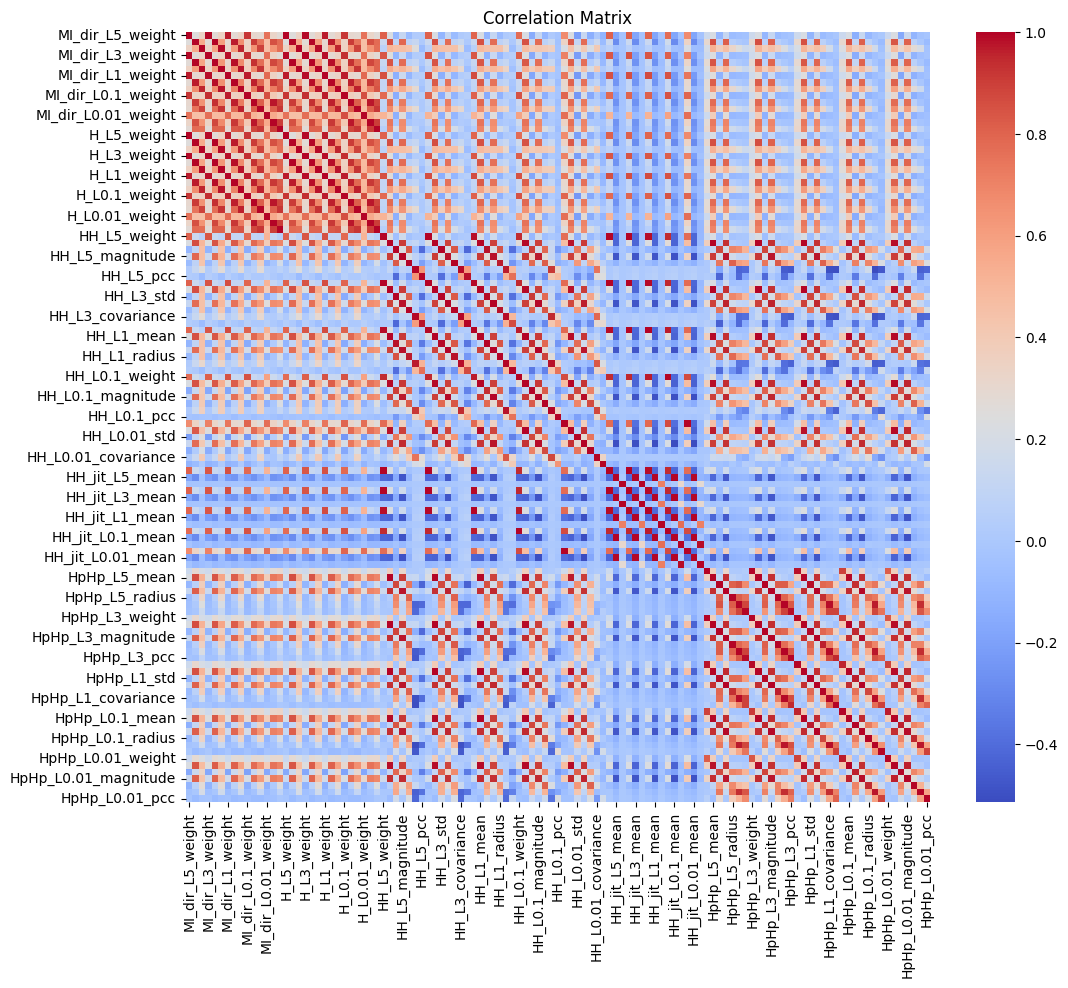

In [35]:
# Correlation matrix for the entire dataset
corr = sample_data.drop(['label','device'], axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')     
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm



In [37]:

# Filter for specific device
df_device = sample_data[sample_data['device'] == "Ecobee_Thermostat"].copy()

In [38]:
# Separate features and scale
X = df_device.drop(['label', 'device'], axis=1)
X_scaled = StandardScaler().fit_transform(X)


In [39]:
# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [40]:
import matplotlib.pyplot as plt
cmap = plt.colormaps['tab10']
